In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [2]:
os.getcwd()

'c:\\Users\\DELL\\AppData\\Local\\Programs\\Microsoft VS Code'

In [3]:
os.chdir('C:\\Users\\DELL\\datasets')

In [4]:
dataset=pd.read_csv('preprocessed.csv')

In [5]:
dataset.head()

,Unnamed: 0,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_C,nameDest_C,nameDest_M
0,0,1,0,0,12.044359,11.984786,15.078545,0.000000,0.0,False,False,False,True,False,True,False,True
1,1,1,0,0,9.964112,9.872292,11.236082,0.000000,0.0,False,False,False,True,False,True,False,True
2,2,1,1,0,5.204007,0.000000,6.827017,0.000000,0.0,False,False,False,False,True,True,True,False
3,3,1,1,0,5.204007,0.000000,6.827017,17.076888,0.0,False,True,False,False,False,True,True,False
4,4,1,0,0,10.634773,10.305174,15.509614,0.000000,0.0,False,False,False,True,False,True,False,True


In [6]:
dataset.corr

<bound method DataFrame.corr of          Unnamed: 0  step  isFraud  isFlaggedFraud  oldbalanceOrg   
0                 0     1        0               0      12.044359  \
1                 1     1        0               0       9.964112   
2                 2     1        1               0       5.204007   
3                 3     1        1               0       5.204007   
4                 4     1        0               0      10.634773   
...             ...   ...      ...             ...            ...   
6362615     6362615   743        1               0      12.735768   
6362616     6362616   743        1               0      15.657870   
6362617     6362617   743        1               0      15.657870   
6362618     6362618   743        1               0      13.652996   
6362619     6362619   743        1               0      13.652996   

         newbalanceOrig     amount  oldbalanceDest  newbalanceDest   
0             11.984786  15.078545        0.000000        0.000000  \

In [9]:
df=dataset.drop(columns=['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','nameOrig_C',	'nameDest_C','nameDest_M'],inplace=True)


In [10]:
dataset.head()

,Unnamed: 0,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,0,1,0,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,1,0,0,9.964112,9.872292,11.236082,0.000000,0.0
2,2,1,1,0,5.204007,0.000000,6.827017,0.000000,0.0
3,3,1,1,0,5.204007,0.000000,6.827017,17.076888,0.0
4,4,1,0,0,10.634773,10.305174,15.509614,0.000000,0.0


In [12]:
dataset['newbalanceDest'].unique()

array([ 0.        , 18.87913147, 23.10252092, ..., 32.13156562,
       37.91609101, 38.60583262])

In [13]:
#independent variable
x=dataset.iloc[:,:-1].values

#dependent variable
y=dataset.iloc[:,-1].values

In [14]:
x

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.19847859e+01, 1.50785449e+01, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.87229199e+00, 1.12360825e+01, 0.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 6.82701721e+00, 0.00000000e+00],
       ...,
       [6.36261700e+06, 7.43000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.78644024e+01, 2.04482695e+01],
       [6.36261800e+06, 7.43000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 2.91689629e+01, 0.00000000e+00],
       [6.36261900e+06, 7.43000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 2.91689629e+01, 3.80129916e+01]])

In [15]:
y

array([ 0.        ,  0.        ,  0.        , ..., 37.91609101,
        0.        , 38.60583262])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=regressor.predict(x_test)
y_pred

array([34.25881468,  0.61282723,  9.50930409, ..., -1.14794299,
        1.98373414, 22.86287289])

In [22]:
import statsmodels.api as sm

In [23]:
x_stats=sm.add_constant(x_train)
regsummary=sm.OLS(y_train,x_stats).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.741e+06
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:33   Log-Likelihood:            -1.3778e+07
No. Observations:             4453834   AIC:                         2.756e+07
Df Residuals:                 4453825   BIC:                         2.756e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2520      0.012   -430.138      0.000      -5.276      -5.228
x1         -3.691e-08   5.26e-09     -7.015      0.000   -4.72e-08   -2.66e-08
x2             0.0004   6.79e-05      5.878      0.000       0.000       0.001
x3            -6.0021      0.071    -84.925      0.000      -6.141      -5.864
x4            -3.9516      1.689     -2.339      0.019      -7.262      -0.641
x5             0.5079      0.001    719.129      0.000       0.506       0.509
x6            -0.6000      0.001   -936.941      0.000      -0.601      -0.599
x7             0.4677      0.001    729.136      0.000       0.466       0.469
x8             0.8021      0.000   3662.793      0.000       0.802       0.802
==============================================================================
Omnibus:                   493177.398   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4782040.983
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                       8.076   Cond. No.                     2.45e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
regsummary.rsquared_adj

0.8704613816596422

---------------------------------------------------------------------------------------------------------------------


In [39]:
#understanding the transaction type
#The format of type column is in object format so to convert it into int format we will need count.
df=pd.read_csv('Fraud.csv')
print(df.type.value_counts())     



type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [ ]:
# The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status 
# of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some 
# threshold value.



In [48]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [49]:


print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].min()



Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [50]:


print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()



Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [51]:
# Since there is no missing and garbage value, there is no need for data cleaning, but we still need to perform data analysis 
# as data contains huge variation of the value in different columns. Normalization will also imporve the overall accuracy of 
#the machine learning model.

Text(0, 0.5, 'Amount')

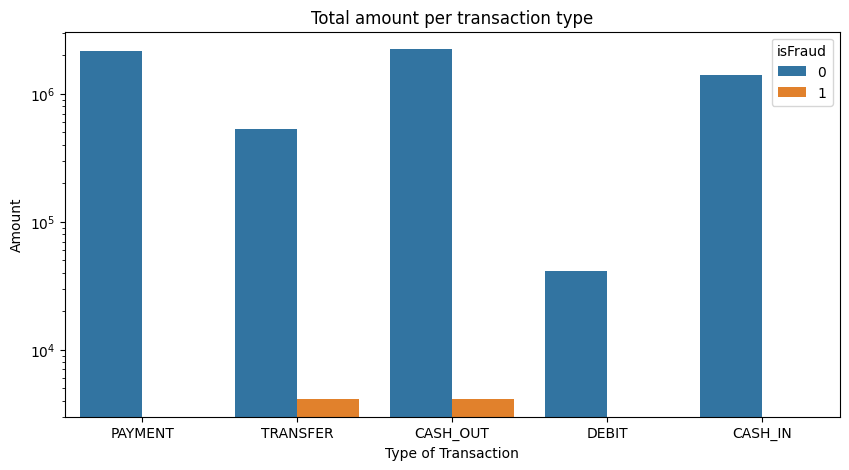

In [52]:


plt.figure(figsize=(10,5))
sns.countplot( x=df['type'],hue=df['isFraud'])
plt.yscale('log')
plt.title("Total amount per transaction type")
plt.xlabel("Type of Transaction")
plt.ylabel("Amount")



In [53]:


df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [57]:


df.loc[df.isFraud == 1 ].type.unique()



array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [59]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [60]:


legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])

percentage_legit = (legit/len(df)) * 100
percentage_fraud = (fraud/len(df)) * 100
print('percentage_legit=', percentage_legit)
print('percentage_fraud=', percentage_fraud)



percentage_legit= 99.87091795518198
percentage_fraud= 0.12908204481801522


In [61]:
# Lets drop unuseful coloumns from the dataset
df = df.drop(['nameOrig','isFlaggedFraud','nameDest'],axis=1)

In [62]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [63]:


df_dummy = pd.get_dummies(df['type'], prefix='tp')
df_dummy



,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [64]:


df = pd.concat([df,df_dummy],axis=1)
df



,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,False,True,False
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,False,True,False
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,False,False,False,False,True
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,False,True,False,False,False
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,False,True,False,False,False
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,False,True
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,False,True,False,False,False
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,False,True


In [65]:


df.drop('type',axis=1,inplace=True)



In [66]:


df.head()



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [92]:
#Independent variable
X=df.drop('isFraud',axis=1)

# Dependent variable
y=df['isFraud']

In [100]:


# Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)



In [94]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



In [95]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear',C=1, random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [96]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [98]:
print(confusion_matrix(y_test,y_pred))

[[1270883       0]
 [      0    1641]]


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       1.00      1.00      1.00      1641

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

